In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import datapackage
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as ts
from statsmodels.iolib.summary2 import summary_col

### STARGAZER ###

from stargazer.stargazer import Stargazer, LineLocation

url = 'https://raw.githubusercontent.com/joe-ascroft/phd/master/data/df_nzgas.csv'
df = pd.read_csv(url)
df["DATE"] = pd.to_datetime(df["DATE"],dayfirst=True)
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col],errors='coerce')

df["nzbtuusd_r"] = (df["NZBTU_USD"].pct_change())
df = df.dropna()
print(df)

         DATE  Price_NZ    NZ_BTU  NZ_USD_Q  NZBTU_USD        HH  nzbtuusd_r
1  1999-06-01  2.936804  3.098492  0.537400   1.665130  2.290000    0.013934
2  1999-09-01  2.698549  2.847121  0.521433   1.484584  2.693333   -0.108428
3  1999-12-01  2.827617  2.983294  0.511567   1.526154  2.383333    0.028001
4  2000-03-01  2.871244  3.029323  0.493033   1.493557  2.830000   -0.021359
5  2000-06-01  2.719361  2.869078  0.467333   1.340816  3.956667   -0.102267
..        ...       ...       ...       ...        ...       ...         ...
86 2020-09-01  6.594163  6.957211  0.663333   4.614950  2.203333    0.093243
87 2020-12-01  6.825113  7.200877  0.704467   5.072778  2.636667    0.099205
88 2021-03-01  7.414286  7.822487  0.717100   5.609505  3.543333    0.105805
89 2021-06-01  9.099814  9.600814  0.710567   6.822018  3.336667    0.216153
90 2021-09-01  9.154261  9.658258  0.702267   6.782672  4.913333   -0.005767

[90 rows x 7 columns]


In [2]:
mod = sm.tsa.MarkovRegression(df["nzbtuusd_r"], k_regimes=2, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:             nzbtuusd_r   No. Observations:                   90
Model:               MarkovRegression   Log Likelihood                  85.246
Date:                Mon, 28 Feb 2022   AIC                           -158.493
Time:                        10:56:28   BIC                           -143.494
Sample:                             0   HQIC                          -152.444
                                 - 90                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0143      0.020     -0.703      0.482      -0.054       0.026
sigma2         0.0044      0.002      2.563      0.010       0.001       0.008
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0447      0.025      1.776      0.076      -0.005       0.094
sigma2         0.0109      0.003      3.592      0.000       0.005       0.017
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7921      0.256      3.090      0.002       0.290       1.295
p[1->0]        0.1475      0.268      0.550      0.583      -0.378       0.673
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

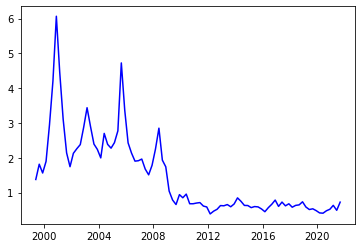

In [3]:
df['ratio'] = df["HH"]/df["NZBTU_USD"]
plt.plot(df['DATE'],df['ratio'],color='blue')

In [8]:
mod = sm.tsa.MarkovRegression(df["ratio"], k_regimes=2, switching_variance = True)
res_mod = mod.fit()
res_mod.summary()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                        Markov Switching Model Results                        
==============================================================================
Dep. Variable:                  ratio   No. Observations:                   90
Model:               MarkovRegression   Log Likelihood                 -28.275
Date:                Mon, 28 Feb 2022   AIC                             68.550
Time:                        10:58:18   BIC                             83.549
Sample:                             0   HQIC                            74.598
                                 - 90                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6256      0.018     35.016      0.000       0.591       0.661
sigma2         0.0156      0.003      4.801      0.000       0.009       0.022
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4927      0.155     16.108      0.000       2.189       2.796
sigma2         0.9470      0.212      4.458      0.000       0.531       1.363
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9893      0.013     77.357      0.000       0.964       1.014
p[1->0]        0.0120      0.015      0.804      0.421      -0.017       0.041
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

In [4]:
mod_1 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=2, switching_variance = True)
res_mod_1 = mod_1.fit()
mod_2 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=3, switching_variance = True)
res_mod_2 = mod_2.fit()
mod_3 = sm.tsa.MarkovRegression(df["ratio"], k_regimes=4, switching_variance = True)
res_mod_3 = mod_3.fit()

/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
/Users/joe/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


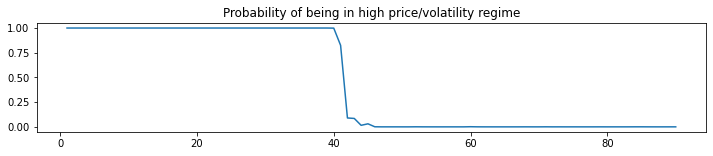

In [12]:
res_mod.filtered_marginal_probabilities[1].plot(
    title='Probability of being in high price/volatility regime', figsize=(12,2))
plt.savefig('/Users/joe/Dropbox/PhD/Writing/TeX/Charts/nzhhmarkovprob.png', dpi=400)

In [10]:
print(res_mod.summary().as_latex())

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:} &      ratio       & \textbf{  No. Observations:  } &     90      \\
\textbf{Model:}         & MarkovRegression & \textbf{  Log Likelihood     } &  -28.275    \\
\textbf{Date:}          & Mon, 28 Feb 2022 & \textbf{  AIC                } &   68.550    \\
\textbf{Time:}          &     11:01:40     & \textbf{  BIC                } &   83.549    \\
\textbf{Sample:}        &        0         & \textbf{  HQIC               } &   74.598    \\
\textbf{}               &       - 90       & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \textbf{std err} & \textbf{z} & \textbf{P$> |$z$|$} & \textbf{[0.025} & \textbf{0.975]}  \\
\midrule
\textbf{const}  &       0.6256  &        0.018     &    35.016  &         0.000        &        0.591    &        0.661     \\
\textbf{sigma2} &       0.0156  &        0.003     &     4.801  &         0.000    

In [ ]:
## example code for latex summary_col([reg0,reg1,reg2],stars=True,float_format='%0.2f') ##